# Data Analysis

In [223]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


import plotly.graph_objects as go
from scipy.stats import multivariate_normal as mn

import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
db_dataset = pd.read_csv("C:\\Users\\SANAH\\Desktop\\diabetes.csv")

In [225]:
db_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [226]:
db_dataset.shape

(768, 9)

In [227]:
db_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [228]:
db_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [229]:
#stats of the data
db_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [230]:
db_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [231]:
db_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Data Preprocessing

In [240]:
# Replacing zero values with NaN
db_dataset_new = db_dataset
db_dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = db_dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 
# Count of NaN
db_dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [241]:
db_dataset_new = db_dataset_new.drop('Insulin',axis=1)

In [246]:
db_dataset_new = db_dataset_new.dropna()

In [248]:
db_dataset_new.agg(['mean','median'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.516917,121.030075,71.505639,29.182331,32.890226,0.502966,31.614662,0.332707
median,2.000000,115.000000,72.000000,29.000000,32.800000,0.416000,28.000000,0.000000


In [250]:
db_dataset_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.516917,121.030075,71.505639,29.182331,32.890226,0.502966,31.614662,0.332707
std,3.312036,30.999226,12.310253,10.523878,6.881109,0.344546,10.761584,0.471626
min,0.000000,56.000000,24.000000,7.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,27.875000,0.258750,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,32.800000,0.416000,28.000000,0.000000
75%,5.000000,141.250000,80.000000,36.000000,36.900000,0.658500,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,67.100000,2.420000,81.000000,1.000000


# Data Visualization

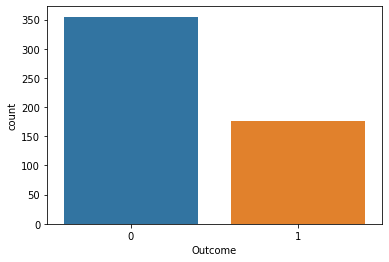

In [251]:
sns.countplot( x = 'Outcome', data = db_dataset_new)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A263F9E248>,
      dtype=object)

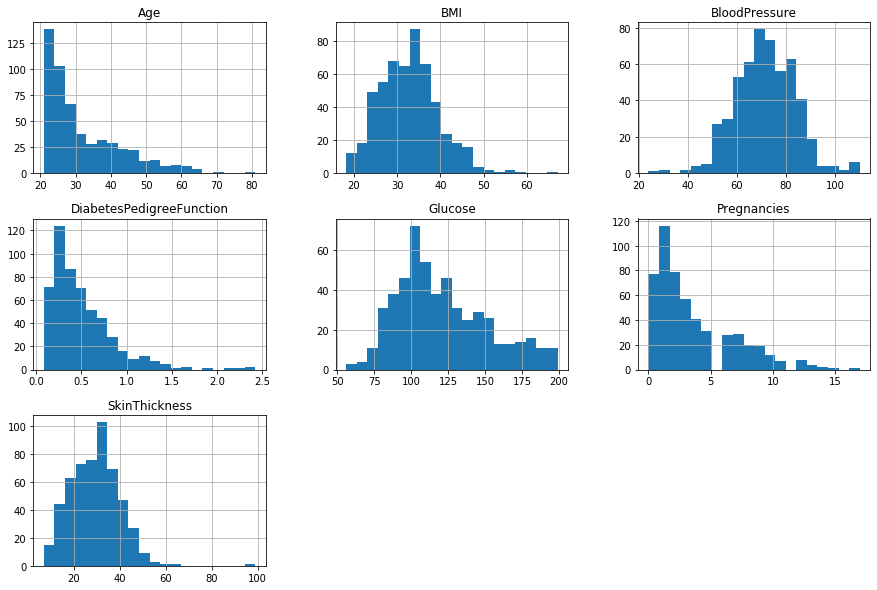

In [252]:
histo_data =db_dataset_new.loc[:,'Pregnancies': 'Age']
histo_data.hist(bins = 20, figsize = (15,10))

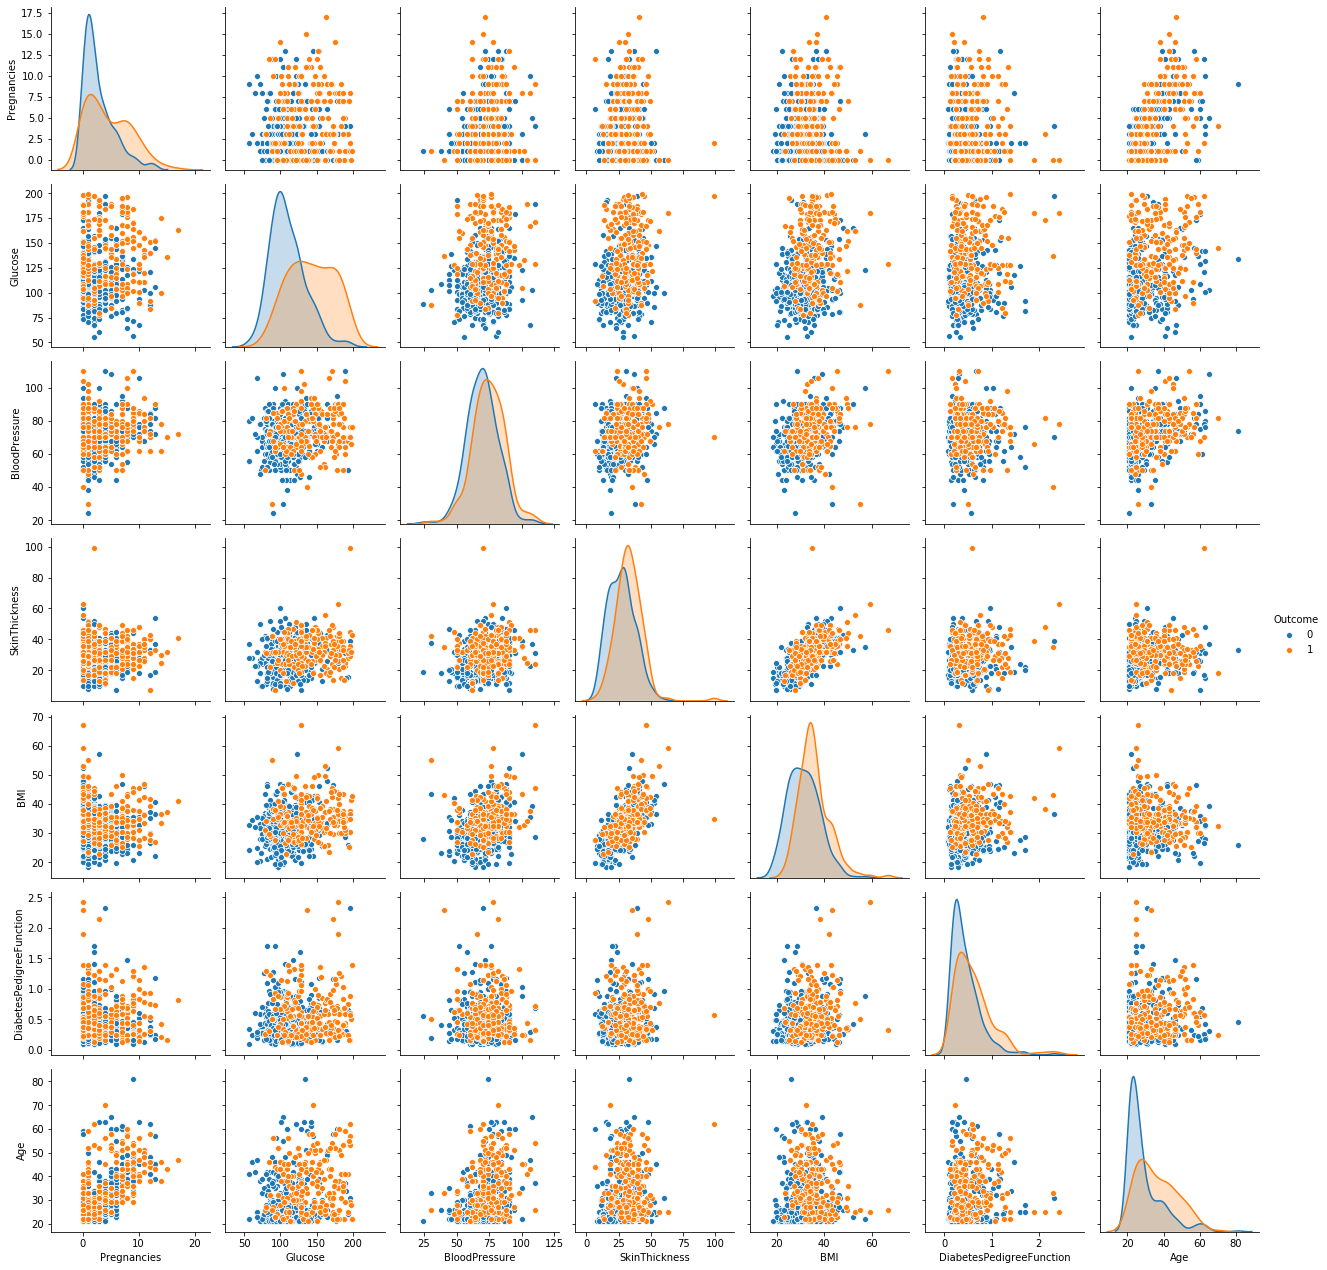

In [253]:
sns.pairplot(data = db_dataset_new, hue = 'Outcome')
plt.show()

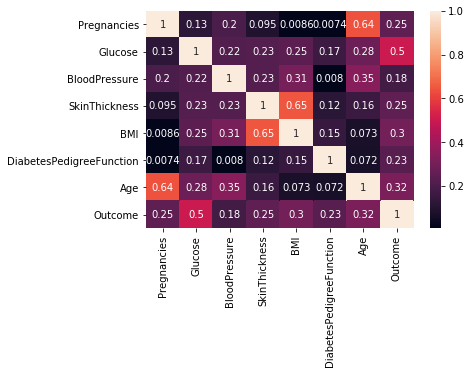

In [254]:
sns.heatmap(db_dataset_new.corr(), annot = True)
plt.show()

# Probablistic Analysis

In [255]:
data = db_dataset_new[["Glucose","BMI","Age","Outcome"]]

In [259]:
#split -> df_y for diabetic and df_n for non diabetic
df_y = data.loc[data["Outcome"] ==1, ["Glucose","BMI", "Age"]]
df_n = data.loc[data["Outcome"] ==0, ["Glucose","BMI", "Age"]]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_y['Glucose'], y=df_y['BMI'], z=df_y['Age'],mode='markers',marker=dict(color="pink"),name='Diabetic'))
fig.add_trace(go.Scatter3d(x=df_n['Glucose'], y=df_n['BMI'], z=df_n['Age'],mode='markers',marker=dict(color="purple"),name='Non Diabetic'))

fig.show()

In [292]:
test_point = [147, 32, 38]
tx = test_point[0]
ty = test_point[1]
tz = test_point[2]
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_y['Glucose'], y=df_y['BMI'], z=df_y['Age'],mode='markers',marker=dict(color="pink"),name='Diabetic'))
fig.add_trace(go.Scatter3d(x=df_n['Glucose'], y=df_n['BMI'], z=df_n['Age'],mode='markers',marker=dict(color="purple"),name='Non Diabetic'))
fig.add_trace(go.Scatter3d(x= [tx], y= [ty], z= [tz],mode='markers',marker=dict(color="cyan"),name='Non Diabetic'))

fig.show()

In [293]:
probability = []

for d in [df_y,df_n]:
    mean = np.mean(d)
    cov = np.cov(d, rowvar = 0)
    prob = mn.pdf(test_point, mean, cov)
    probability.append(prob)


In [294]:
rows_y = df_y.shape[0]
rows_n = df_n.shape[0]

f_probability = rows_n *probability[1] / (rows_n *probability[1] + rows_y *probability[0]) 
print(f"Chance of person being non-diabetic is {100 * f_probability:.2f}%")

Chance of person being non-diabetic is 46.48%


# Data Modeling

In [318]:
X,Y = data.values[:,:-1], data.values[:,-1]

In [319]:
normalize = StandardScaler()
normalize.fit(X)
normalized_data = normalize.transform(X)

In [320]:
X = normalized_data

In [321]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.01, random_state=42, stratify = Y)

In [322]:
LR_model = LogisticRegression()
LR_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [323]:
accuracy = LR_model.score(X_test,Y_test)
accuracy

0.8333333333333334